# Project: Examine The TMDB Movie Database

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I've choosen the TMDB dataset as I'm a passionated movie watcher and in the past I had doubts whether the voting results of movie database services are representative for the real quality of some movies. For example it occurs that bombastic Blockbuster movies are rated much higher on a user driven platform [IMBD](https://www.imdb.com) then on a professional critic driven platform like [Rotten Tomatoes](https://www.rottentomatoes.com). I've choosen these questions for further analysis:

  * __Question 1:__ Does movies have better ratings if they're voted more often?
  * __Question 2:__ Is there a correlation between specific actors and the associated movie rating or associated revenue?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import json

%matplotlib inline



<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
movie_df = pd.read_csv('tmdb_5000_movies.csv')
movie_df.head(2)



,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [3]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

In [4]:
print(type(movie_df['genres'][0]))

<class 'str'>


In [5]:
movie_df['genres'][0]

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

There are multiple fields with lists of dicts to describe multiple properties. There are different ways of solving it, like creating columns for every property if it's important for the own examination. I will create functions that can be applied if needed to extract the information on call.

In [6]:
credits_df = pd.read_csv('tmdb_5000_credits.csv')
credits_df.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [7]:
credits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
movie_id    4803 non-null int64
title       4803 non-null object
cast        4803 non-null object
crew        4803 non-null object
dtypes: int64(1), object(3)
memory usage: 93.8+ KB


### Cleaning __movie_df__

In [8]:
#movie_df.drop(columns=['budget','homepage','original_language','production_countries','production_companies','release_date','status','title','spoken_languages',],inplace=True)
#movie_df.head()

movie_df.drop(['popularity','revenue','overview','tagline','runtime','keywords','genres','budget','homepage','original_language','production_countries','production_companies','release_date','status','title','spoken_languages',], axis=1,inplace=True)
movie_df.head()

,id,original_title,vote_average,vote_count
0,19995,Avatar,7.2,11800
1,285,Pirates of the Caribbean: At World's End,6.9,4500
2,206647,Spectre,6.3,4466
3,49026,The Dark Knight Rises,7.6,9106
4,49529,John Carter,6.1,2124


### Cleaning __credits_df__

The file for this csv is much bigger although it has the same number of columns. The columns __cast__ and __crew__ are containing much more information. They include the complete cast and crew that have created a specific movie. As one question is regarding the cast I will extract only the top five of each movie and dropping the rest.

In [9]:
def extract_top_five_cast(val):
    mov_cast = json.loads(val)
    ex_cast = [] 
    for element in mov_cast[:5]:
        cast_id = element['id']
        name = element['name']
        ex_cast.append((cast_id,name))
    return ex_cast

In [10]:
credits_df['top_five'] = credits_df['cast'].apply(extract_top_five_cast)
cast_df = credits_df.drop(['title','cast','crew'],axis=1)

In [11]:
cast_df.rename(columns={'movie_id':'id'},inplace=True)

In [12]:
cast_df.tail()

,id,top_five
4798,9367,"[(20498, Carlos Gallardo), (57470, Jaime de Ho..."
4799,72766,"[(12833, Edward Burns), (58356, Kerry Bishé), ..."
4800,231617,"[(11867, Eric Mabius), (34915, Kristin Booth),..."
4801,126186,"[(82093, Daniel Henney), (210050, Eliza Coupe)..."
4802,25975,"[(69597, Drew Barrymore), (85563, Brian Herzli..."


Now it's easy to merge the movie dataframe with the cast dataframe by using the __id__ key.
Moreover I will extract all possible actor IDs for beeing able later on to query all existing actors:

In [13]:
all_ids = []
counter = 0

def extract_all_ids(row,s=all_ids):
    for i in range(0,5):
        try:
            temp_id = row[i][0]
            if temp_id not in s:
                s.append(temp_id)
        except:
            pass
        

In [14]:
temp = cast_df['top_five'].apply(extract_all_ids)

In [15]:
len(all_ids)

9394

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1: Does movies have better ratings if they're voted more often?

In [16]:
movie_df['vote_count'].head()

0    11800
1     4500
2     4466
3     9106
4     2124
Name: vote_count, dtype: int64

In [17]:
movie_df['vote_count_normalized'] = 10*(movie_df['vote_count'] - movie_df['vote_count'].min()) / (movie_df['vote_count'].max() - movie_df['vote_count'].min())

In [18]:
movie_df_sc = movie_df.sort_values('vote_count')

In [19]:
movie_df_sc['vote_count_normalized'].head()

4307    0.0
4140    0.0
4638    0.0
4118    0.0
4068    0.0
Name: vote_count_normalized, dtype: float64

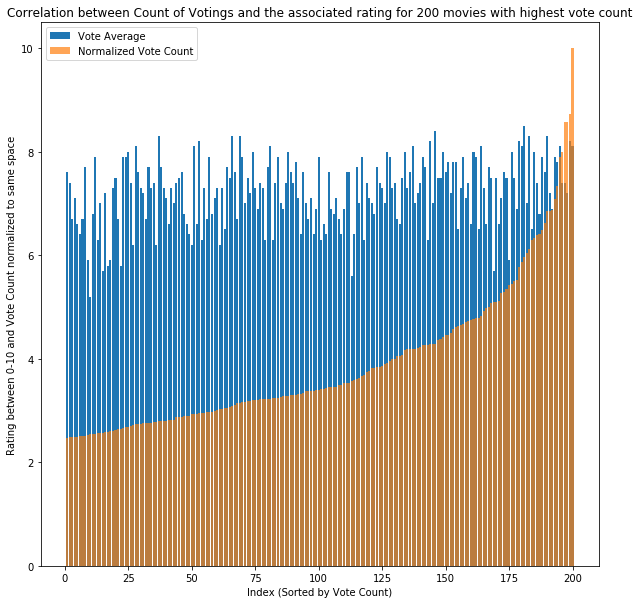

In [20]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings
fig = plt.figure(figsize=(10,10))

plt.bar(range(1,len(movie_df_sc['vote_average'][-200::])+1),movie_df_sc['vote_average'][-200::])
plt.bar( range(1,len(movie_df_sc['vote_average'][-200::])+1),movie_df_sc['vote_count_normalized'][-200::],alpha=0.7)
plt.title("Correlation between Count of Votings and the associated rating for 200 movies with highest vote count")
plt.xlabel("Index (Sorted by Vote Count)")
plt.ylabel("Rating between 0-10 and Vote Count normalized to same space")

plt.gca().legend(('Vote Average','Normalized Vote Count'))

In [21]:
corr = movie_df_sc['vote_average'].corr(movie_df_sc['vote_count_normalized'])
corr

0.3129974039957596

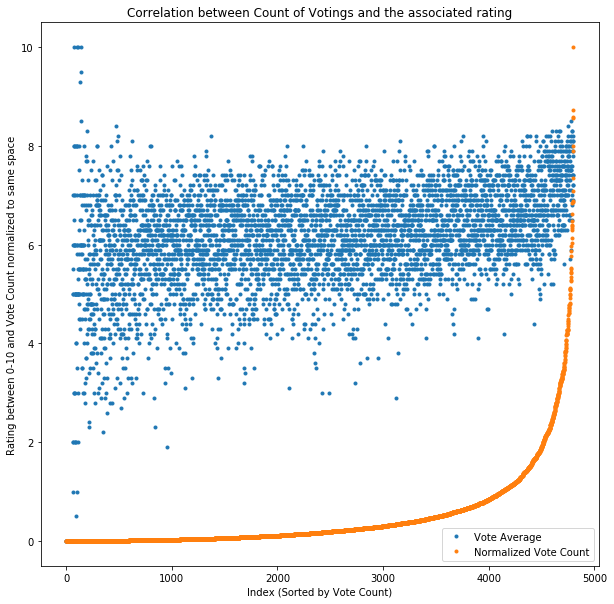

In [22]:
fig = plt.figure(figsize=(10,10))

plt.plot(range(1,len(movie_df_sc)+1),movie_df_sc['vote_average'],'.')
plt.plot(range(1,len(movie_df_sc)+1),movie_df_sc['vote_count_normalized'],'.')
plt.title("Correlation between Count of Votings and the associated rating")
plt.xlabel("Index (Sorted by Vote Count)")
plt.ylabel("Rating between 0-10 and Vote Count normalized to same space")

plt.gca().legend(('Vote Average','Normalized Vote Count'))

In [23]:
movie_df_sc['vote_average_rm']=movie_df_sc['vote_average'].rolling(window=10,min_periods=1).mean()

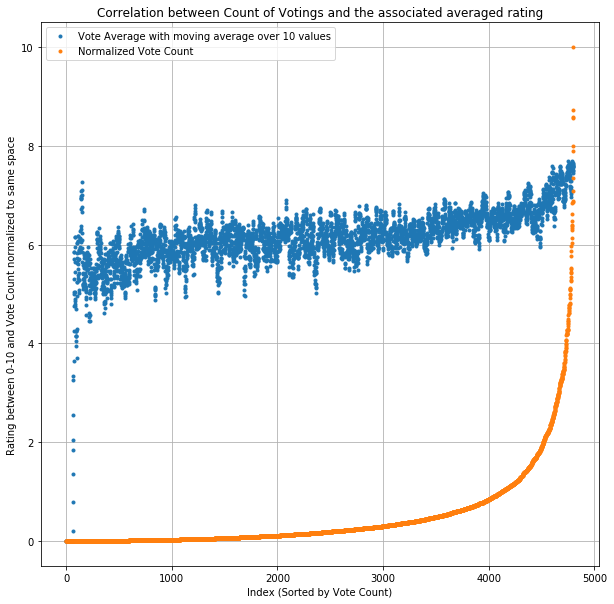

In [24]:
fig = plt.figure(figsize=(10,10))

plt.plot(range(1,len(movie_df_sc)+1),movie_df_sc['vote_average_rm'],'.')
plt.plot(range(1,len(movie_df_sc)+1),movie_df_sc['vote_count_normalized'],'.')
plt.title("Correlation between Count of Votings and the associated averaged rating")
plt.xlabel("Index (Sorted by Vote Count)")
plt.ylabel("Rating between 0-10 and Vote Count normalized to same space")

plt.grid(b=None, which='major', axis='both')

plt.gca().legend(('Vote Average with moving average over 10 values','Normalized Vote Count'))

With data ordered by the count of votings, a __normalized vote count__ and a moving average over the __vote_average__ gives a clear positive correlation between the count of votings and the rating. Especially the top 300 movies with a __vote_count__ above 2700 show a significant positive correlation.

### Research Question 2:  Is there a correlation between specific actors and the associated movie rating or associated revenue?

#### Merging cast and movie dataframe

For achieving this answer we have to merge the processed cast dataframe with the movie dataframe

In [25]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.mer
moviecast_df = movie_df.merge(cast_df,left_on="id",right_on="id",how="inner")
moviecast_df.head(1)

,id,original_title,vote_average,vote_count,vote_count_normalized,top_five
0,19995,Avatar,7.2,11800,8.58057,"[(65731, Sam Worthington), (8691, Zoe Saldana)..."


#### Extract all existing IDs

In [26]:
type(moviecast_df['top_five'][0][0][0])

int

In [27]:
def process_actor(df_row, actor_id):
    top_five = []
    for tupl in df_row['top_five']:
        top_five.append(tupl[0])
    
    if actor_id in top_five:        
        return True
    else:
        return False

In [28]:
actor_frames = []

for actor_id in all_ids[:200]:
    actor_frames.append(cast_df[cast_df.apply(process_actor,axis=1,actor_id=actor_id)])
    
actor_frames

[          id                                           top_five
 0      19995  [(65731, Sam Worthington), (8691, Zoe Saldana)...
 43       534  [(3894, Christian Bale), (65731, Sam Worthingt...
 132    57165  [(65731, Sam Worthington), (3896, Liam Neeson)...
 206    18823  [(65731, Sam Worthington), (3896, Liam Neeson)...
 671   253412  [(76512, Jason Clarke), (131, Jake Gyllenhaal)...
 1146   49527  [(65731, Sam Worthington), (9281, Elizabeth Ba...
 1448  144336  [(1100, Arnold Schwarzenegger), (65731, Sam Wo...
 2147   48289  [(15735, Helen Mirren), (8785, Ciarán Hinds), ...,
           id                                           top_five
 0      19995  [(65731, Sam Worthington), (8691, Zoe Saldana)...
 47     54138  [(62064, Chris Pine), (17306, Zachary Quinto),...
 56    188927  [(62064, Chris Pine), (17306, Zachary Quinto),...
 94    118340  [(73457, Chris Pratt), (8691, Zoe Saldana), (5...
 942   228326  [(8688, Diego Luna), (38673, Channing Tatum), ...
 1245   62835  [(8691, Z

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!